## Provisional Code with functions for EDA and a Logistic Regression Model Just in case.

In [2]:
# Bye bye warnings.
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# to suppress scientific notations because who wants to see 1.2 E2 like bruh just say 12.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
churn = pd.read_csv('../Resources/BankChurners.csv')
# copying data to preserve original
data = churn.copy()

In [5]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
#check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
# no nulls so moving on
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [9]:
# drop useless identifiers because we don't care.
data.drop(['CLIENTNUM'],axis=1,inplace=True)

In [10]:
# look at objects to avoid that will be encoded soon
data.describe(include=['object']).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [12]:
for i in data.describe(include=['object']).columns:
    print('Unique values in',i, 'column are as follows :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in Attrition_Flag column are as follows :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender column are as follows :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level column are as follows :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status column are as follows :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category column are as follows :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unk

In [13]:
#function for univariate plot histogram and boxplot to see skew, and extremes
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # this ensures the x axis is shared to reduce confusion
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Now we can make the subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram to see skew
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram to see skew

In [17]:
catv = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
numv = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
        'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i in catv: #make the categoricals, categorical.
    data[i] = data[i] = data[i].astype('category')

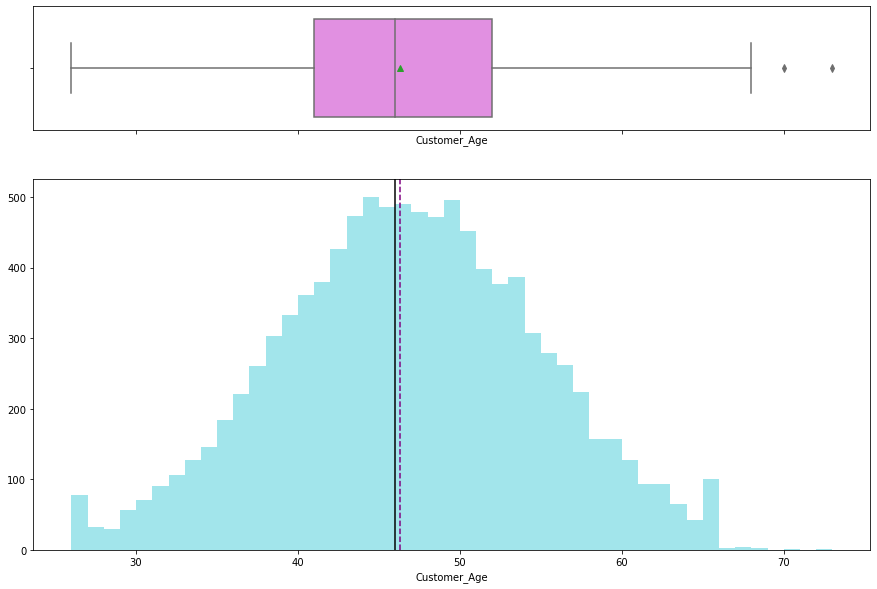

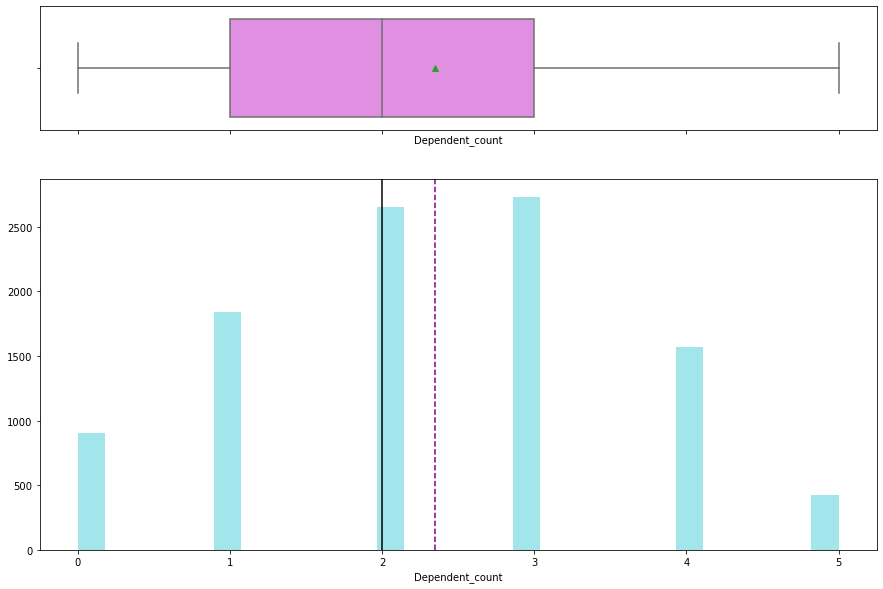

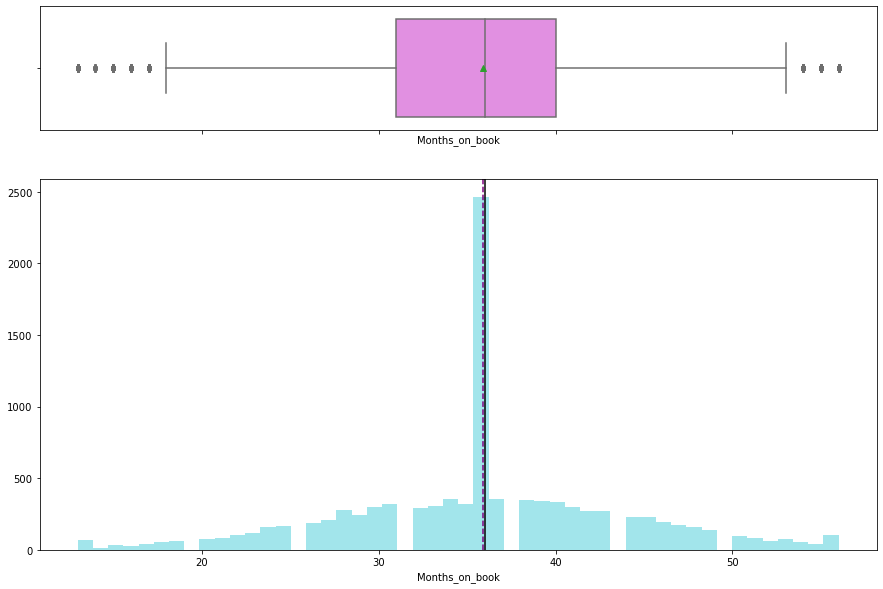

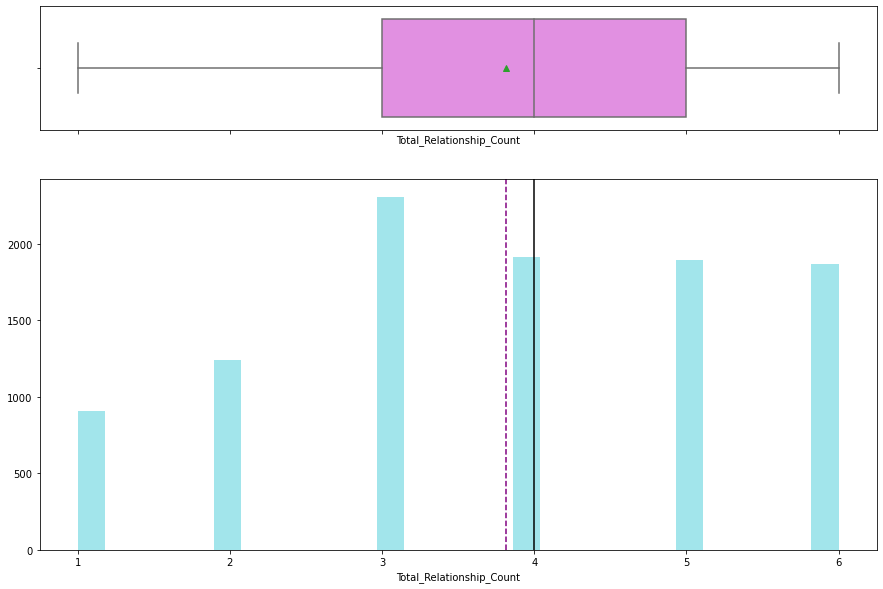

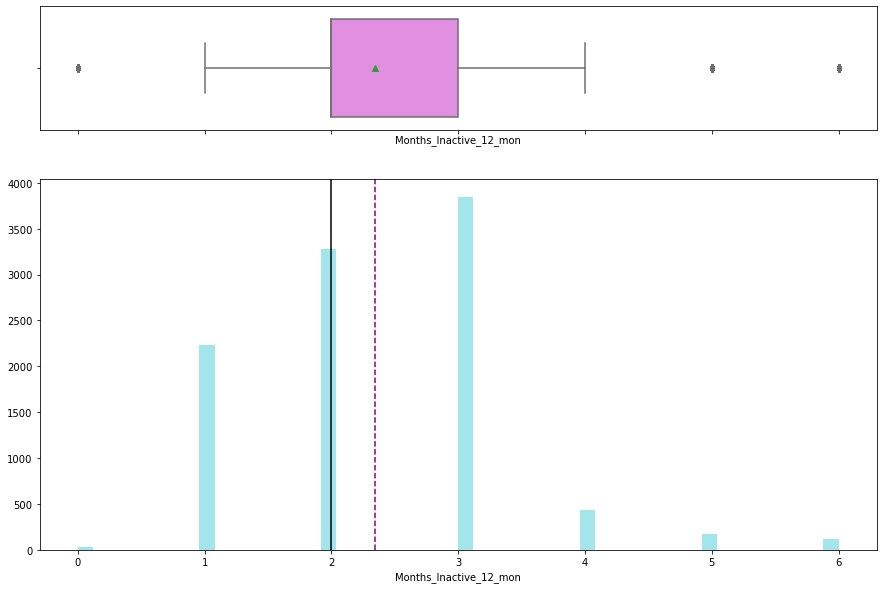

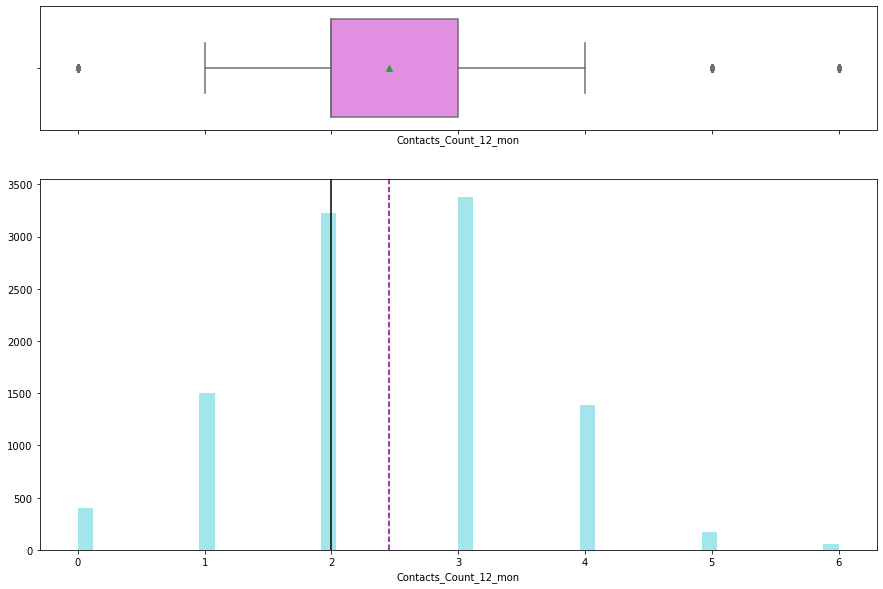

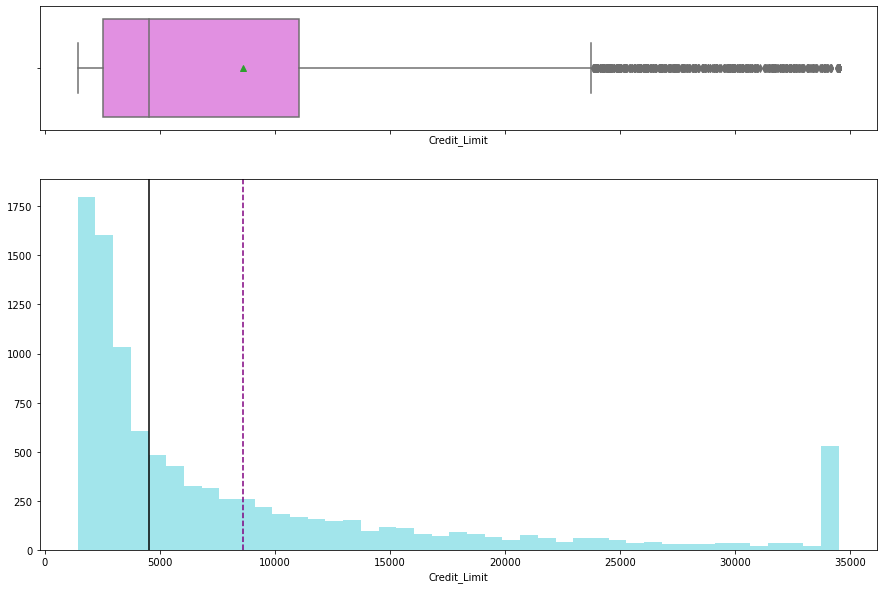

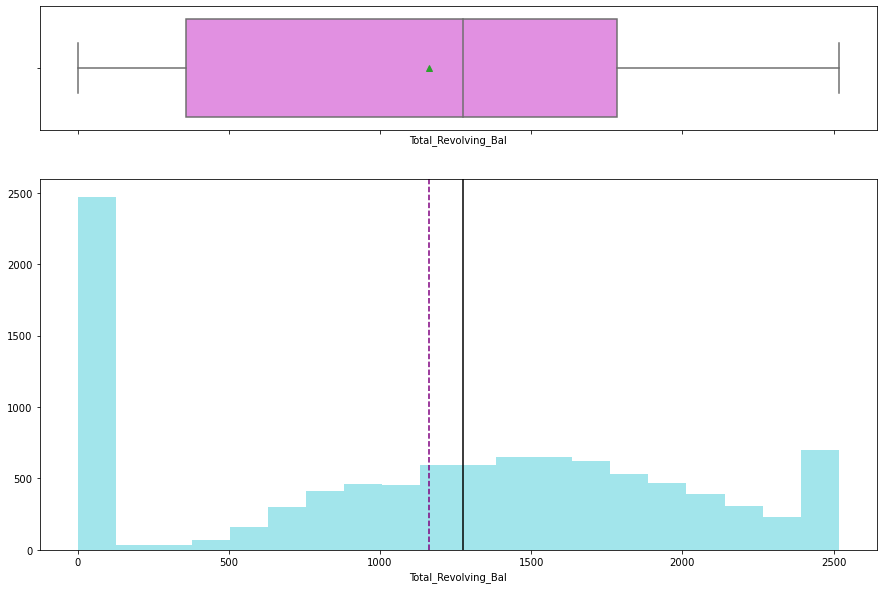

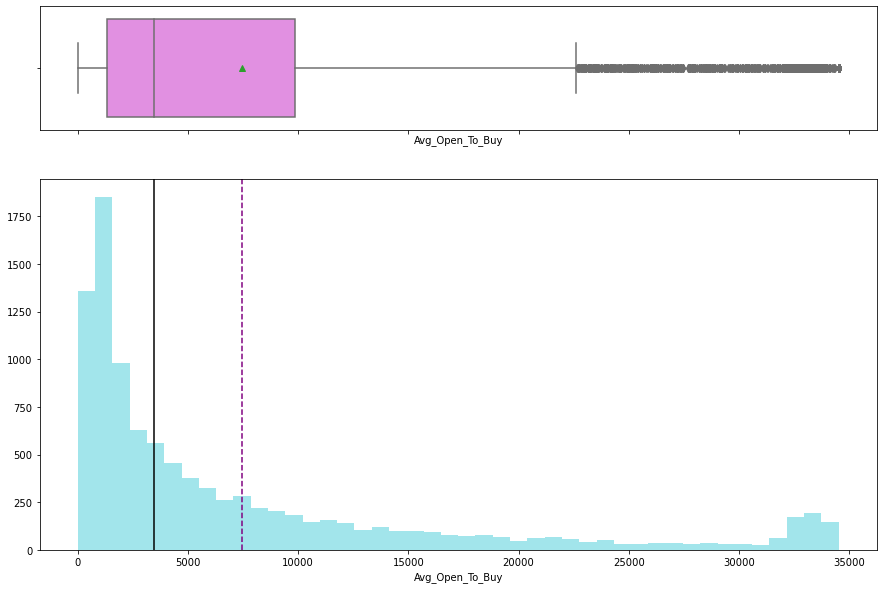

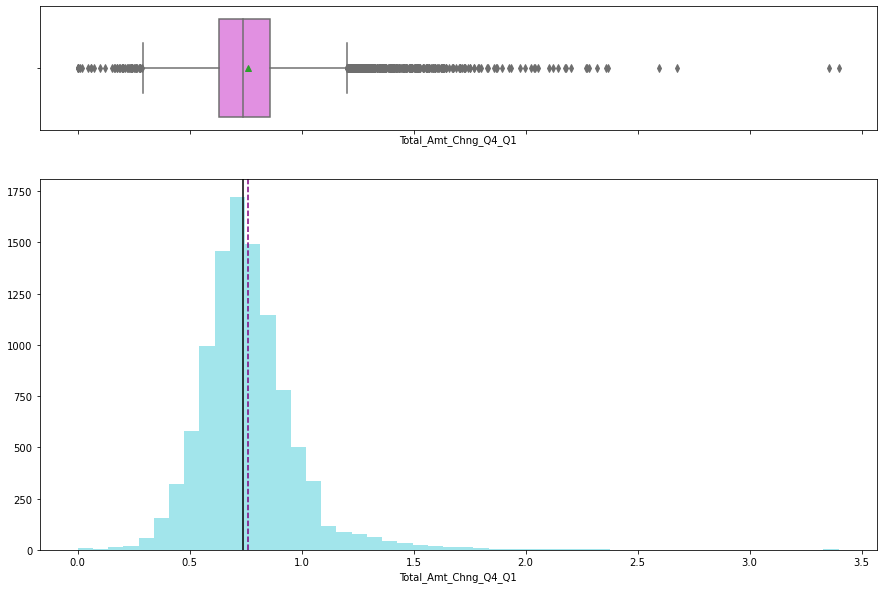

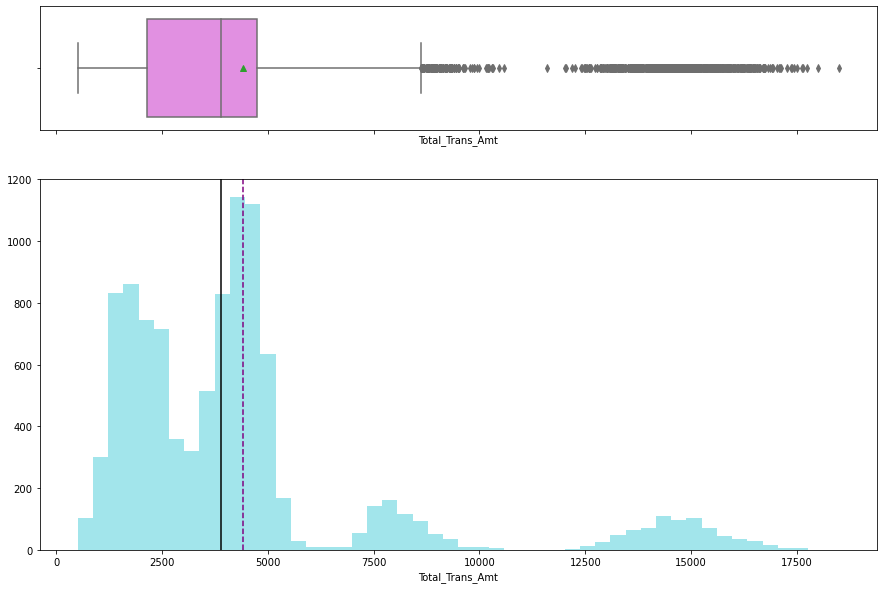

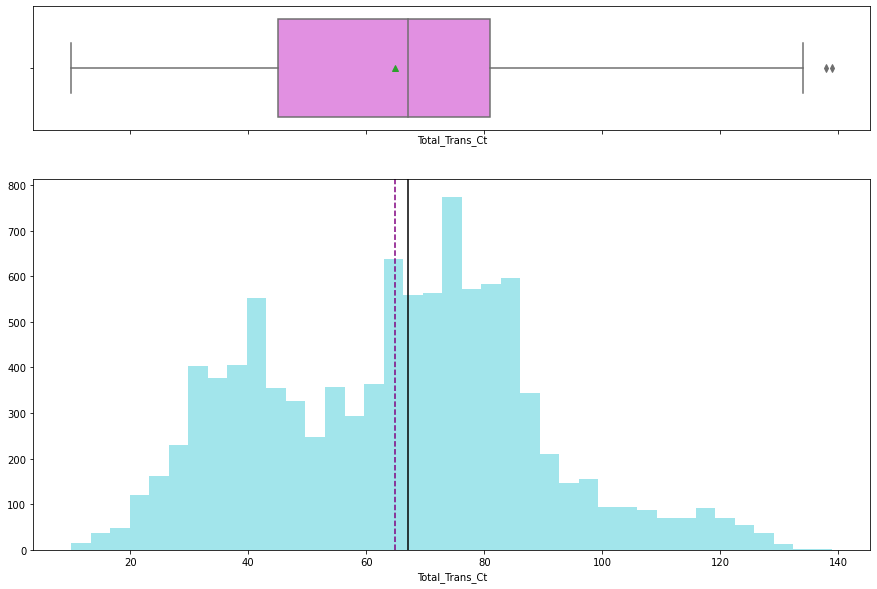

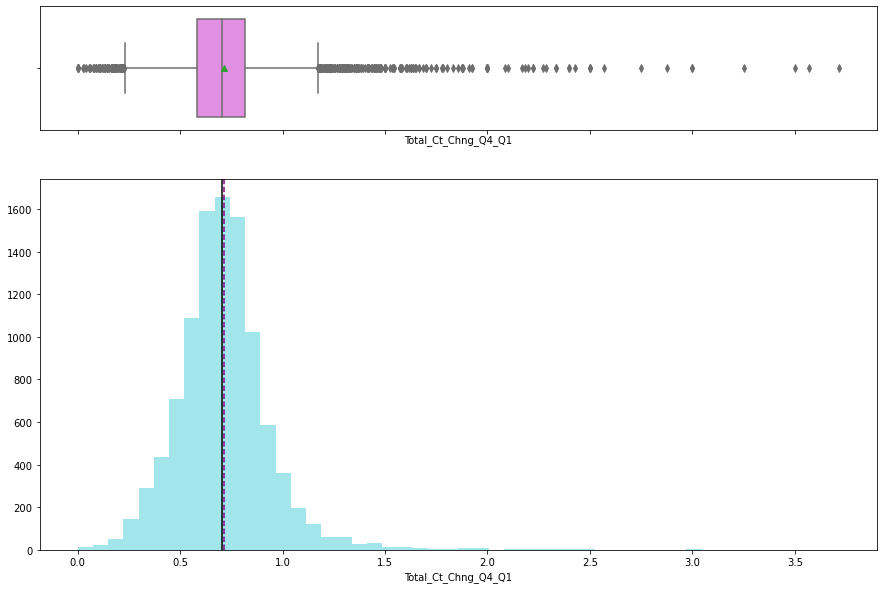

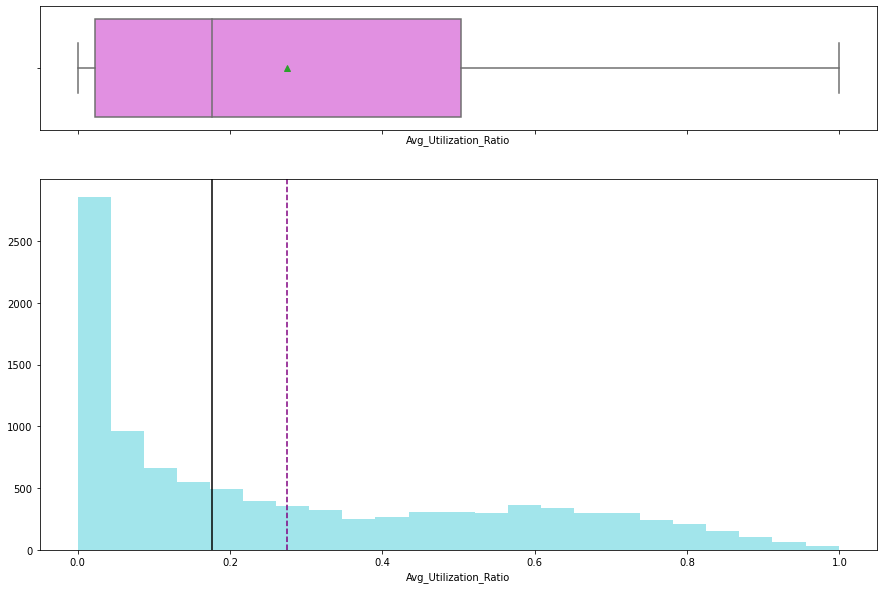

In [19]:
for colname in numv:
    histogram_boxplot(data[colname])

In [26]:
def perc_on_bar(z,data):

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

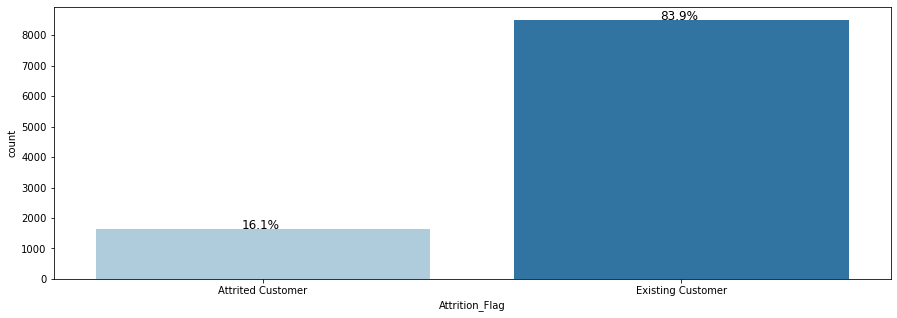

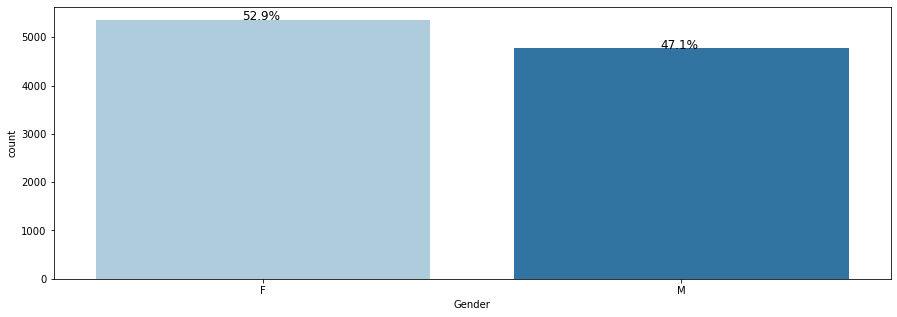

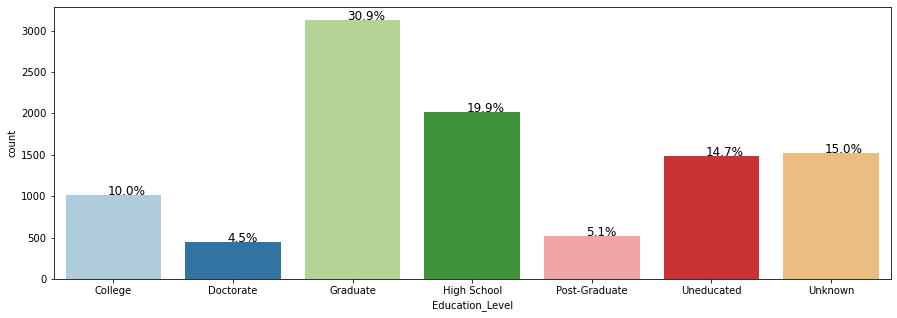

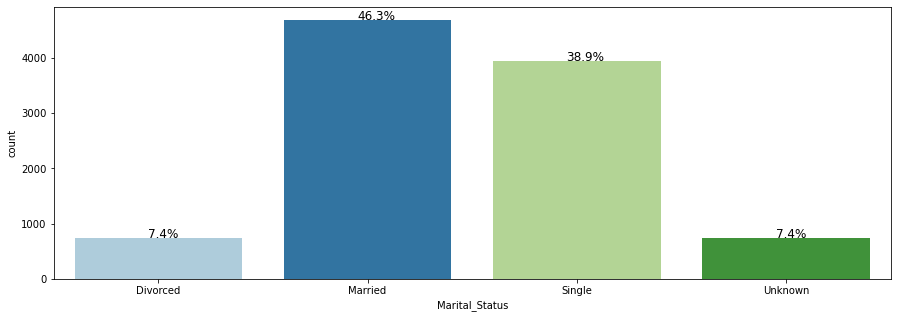

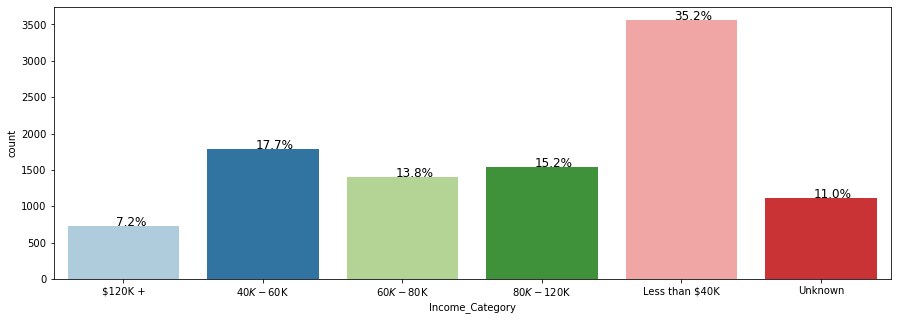

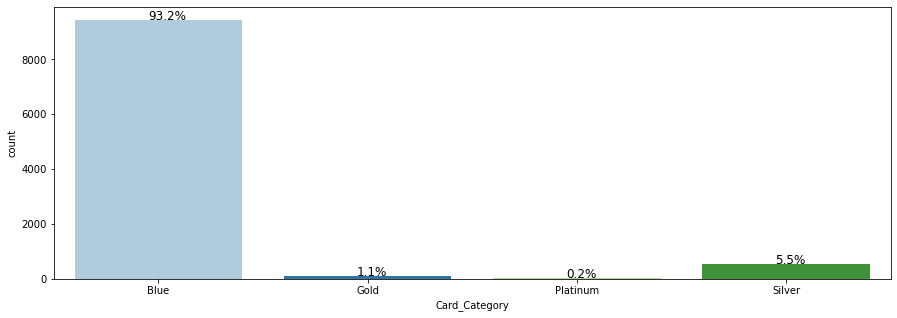

In [28]:
for catcol in catv: # Punny
    perc_on_bar(catcol,data)

In [29]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data['Attrition_Flag'].replace('Existing Customer',0,inplace=True)
data['Attrition_Flag'].replace('Attrited Customer',1,inplace=True)

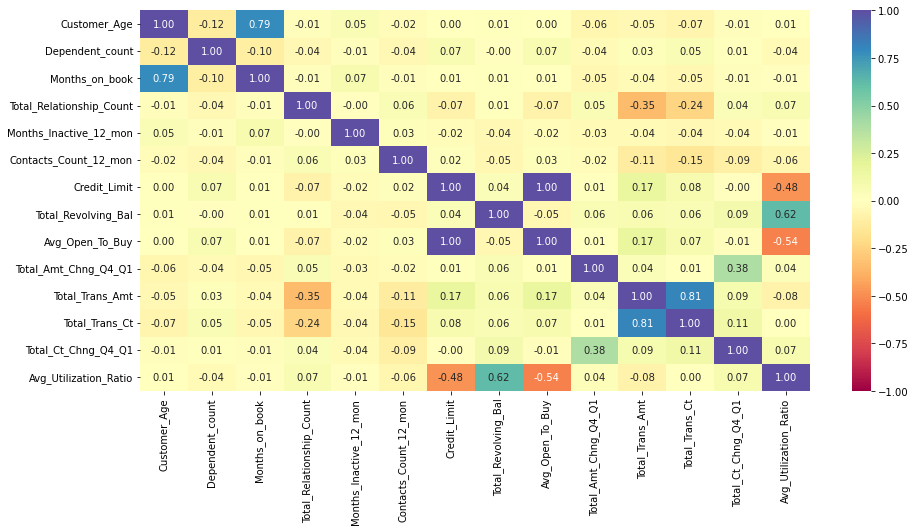

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

In [36]:
### Function to plot stacked bar charts for categorical columns for target column (in this case attrition [CHANGE TO RELEVANT CLASS])
def stacked_plot(x,data,target):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(data[x],data[target],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(data[x],data[target],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition_Flag     1     0    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


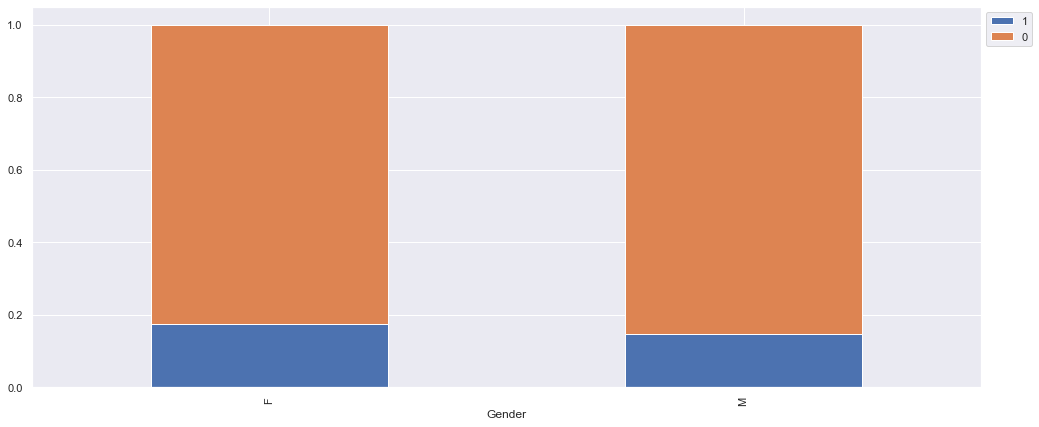

Attrition_Flag      1     0    All
Education_Level                   
All              1627  8500  10127
Graduate          487  2641   3128
High School       306  1707   2013
Unknown           256  1263   1519
Uneducated        237  1250   1487
College           154   859   1013
Doctorate          95   356    451
Post-Graduate      92   424    516
------------------------------------------------------------------------------------------------------------------------


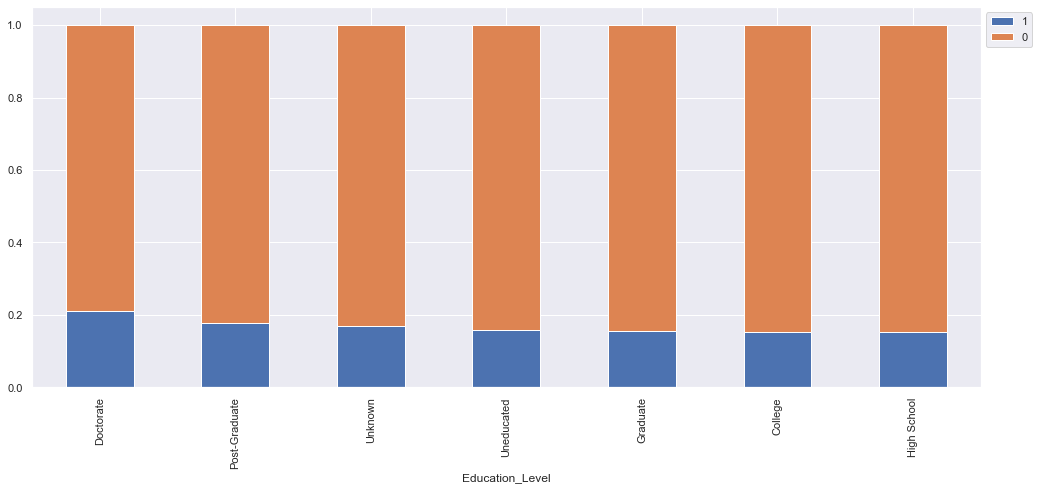

Attrition_Flag     1     0    All
Marital_Status                   
All             1627  8500  10127
Married          709  3978   4687
Single           668  3275   3943
Unknown          129   620    749
Divorced         121   627    748
------------------------------------------------------------------------------------------------------------------------


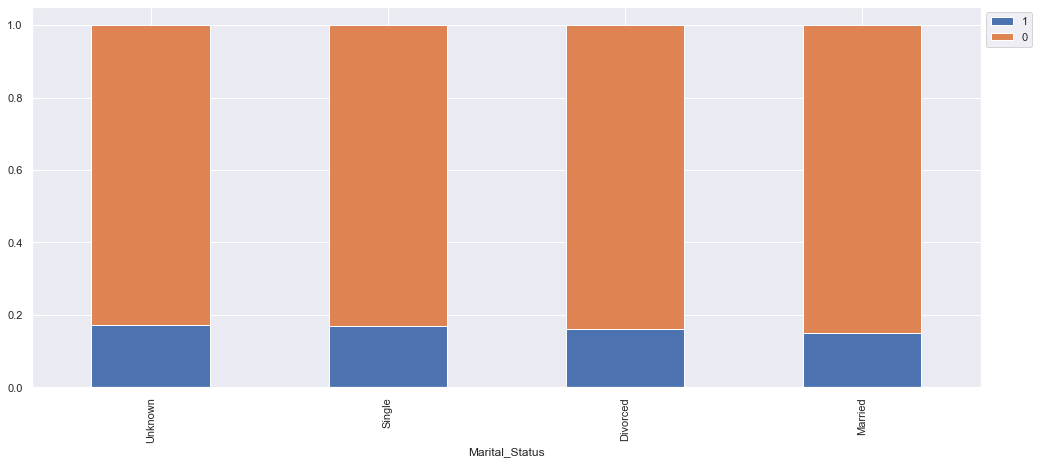

Attrition_Flag      1     0    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       271  1519   1790
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
Unknown           187   925   1112
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


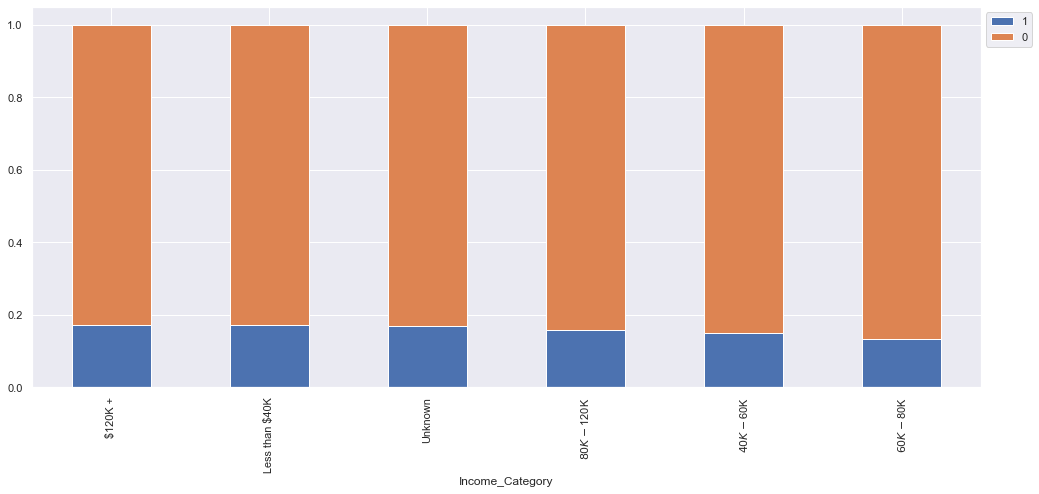

Attrition_Flag     1     0    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


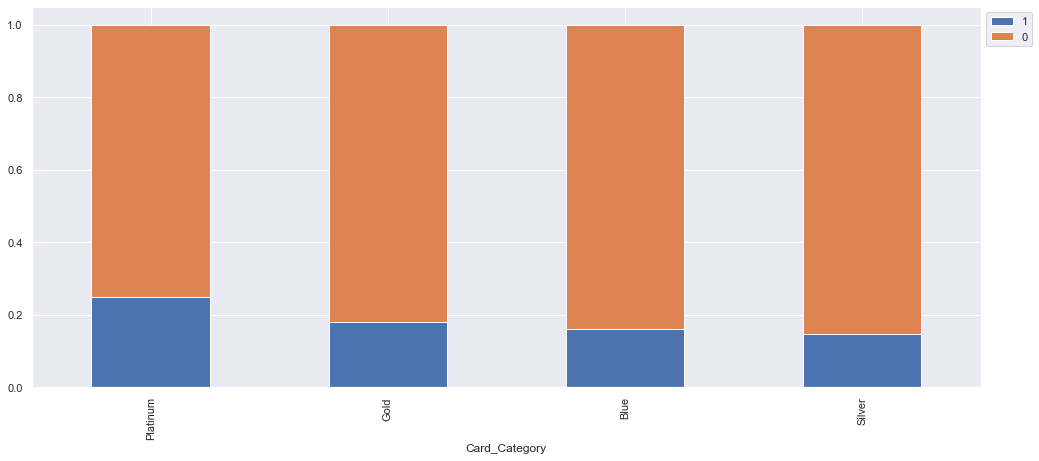

In [37]:
target = "Attrition_Flag"
for catcol in catv: # Still punny
    if catcol != target:
        stacked_plot(catcol,data,target)

In [38]:
### Function to plot distributions and Boxplots of customers
def plot(x,target):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an Attrited Customer')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an Existing Customer')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Attrition_Flag')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Attrition_Flag - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

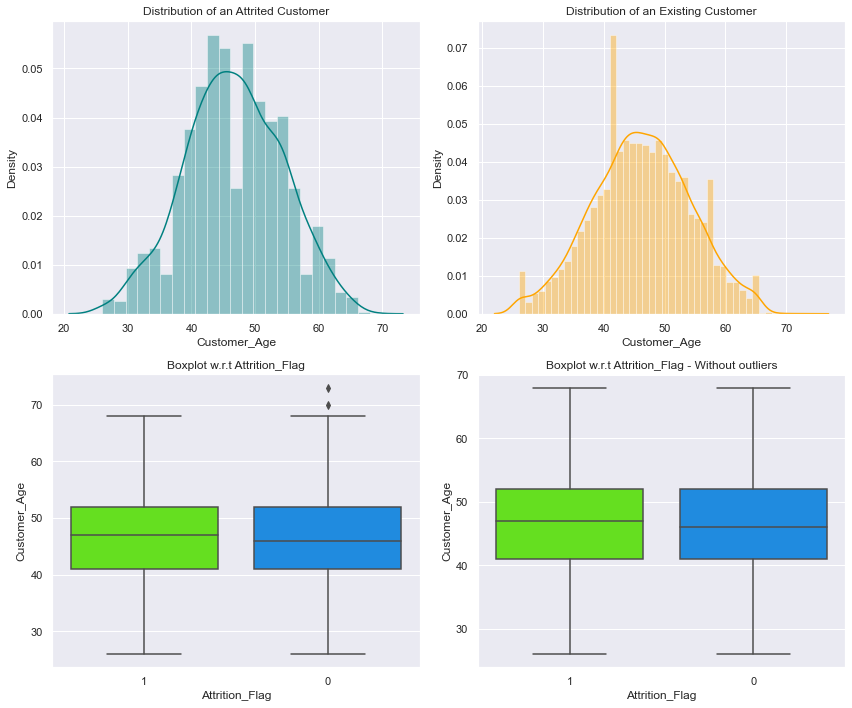

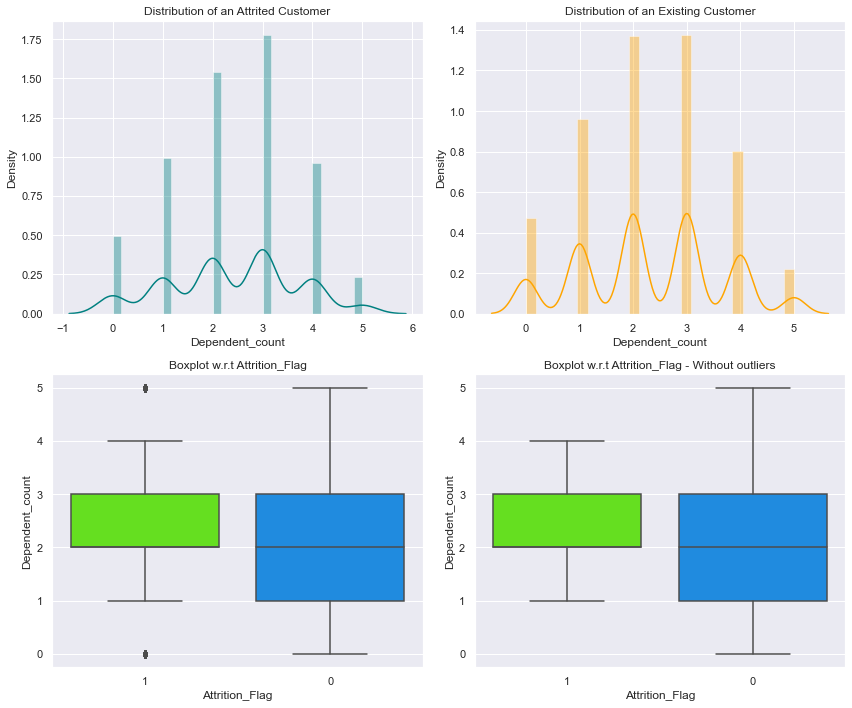

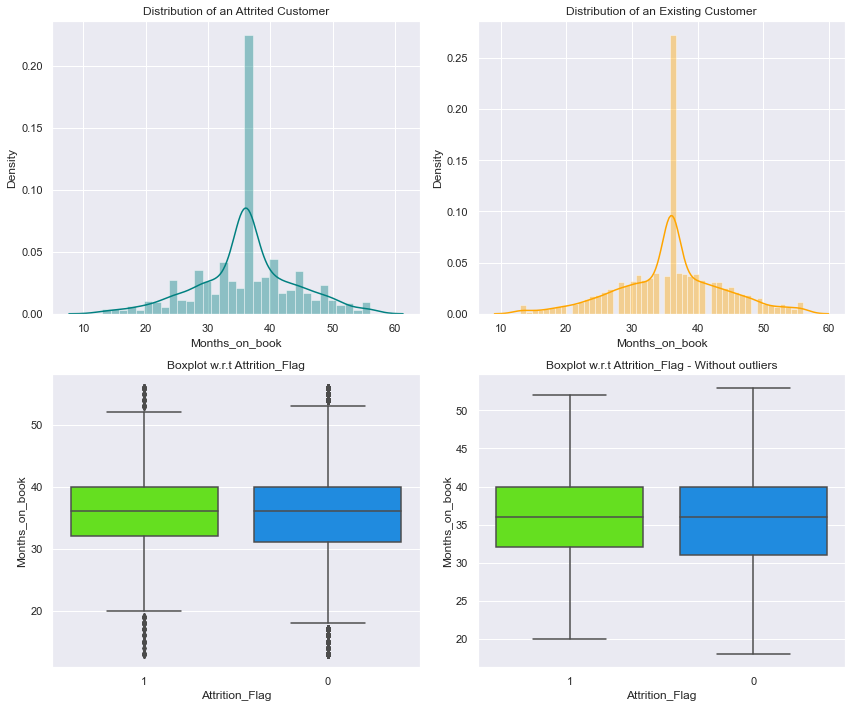

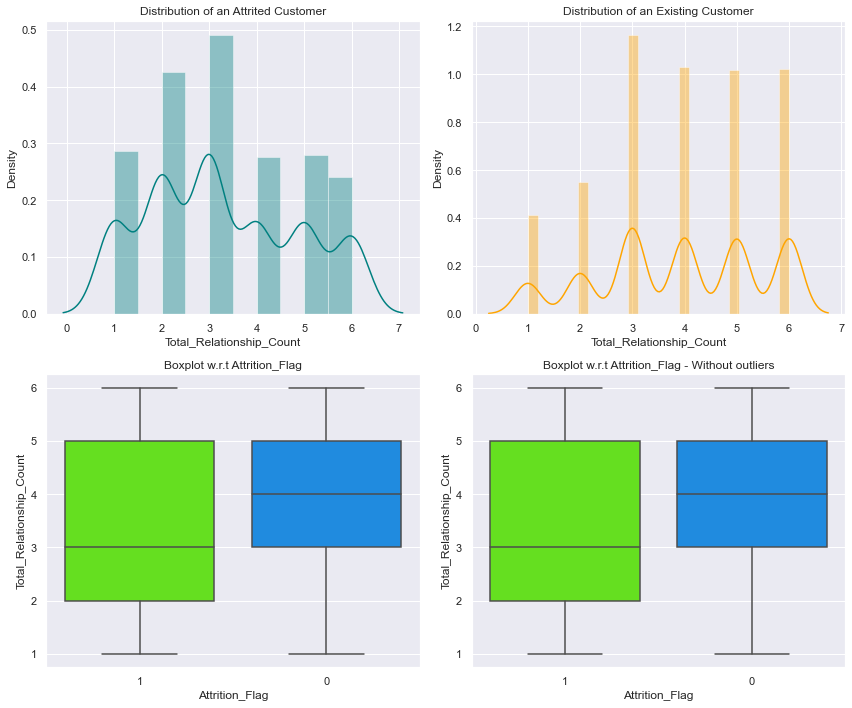

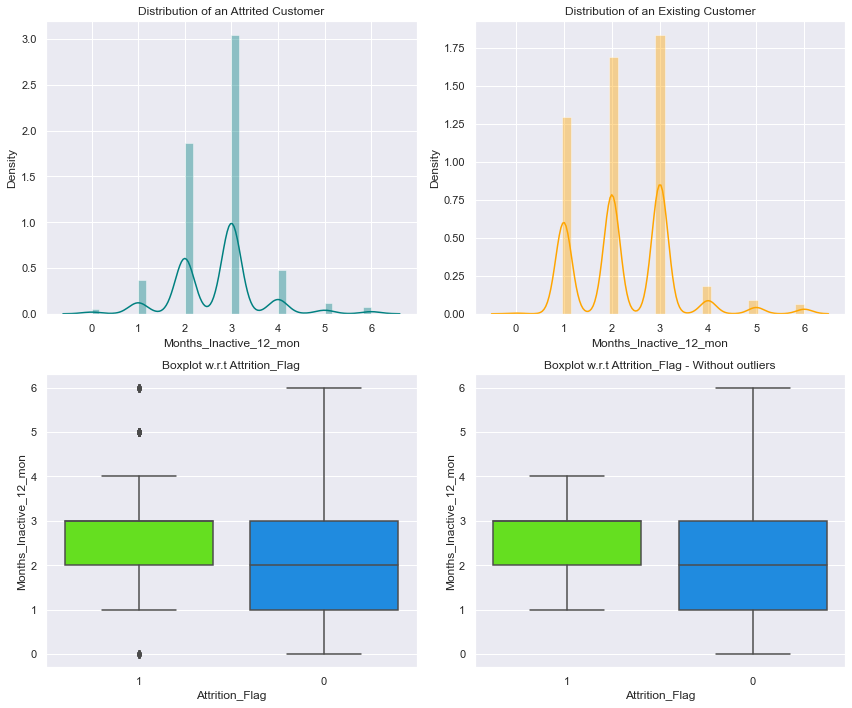

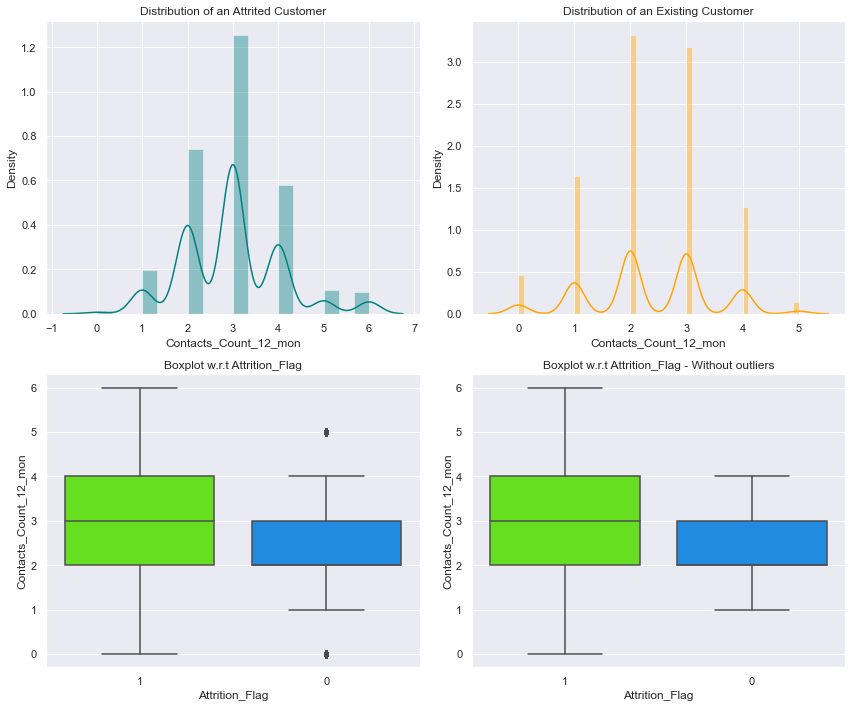

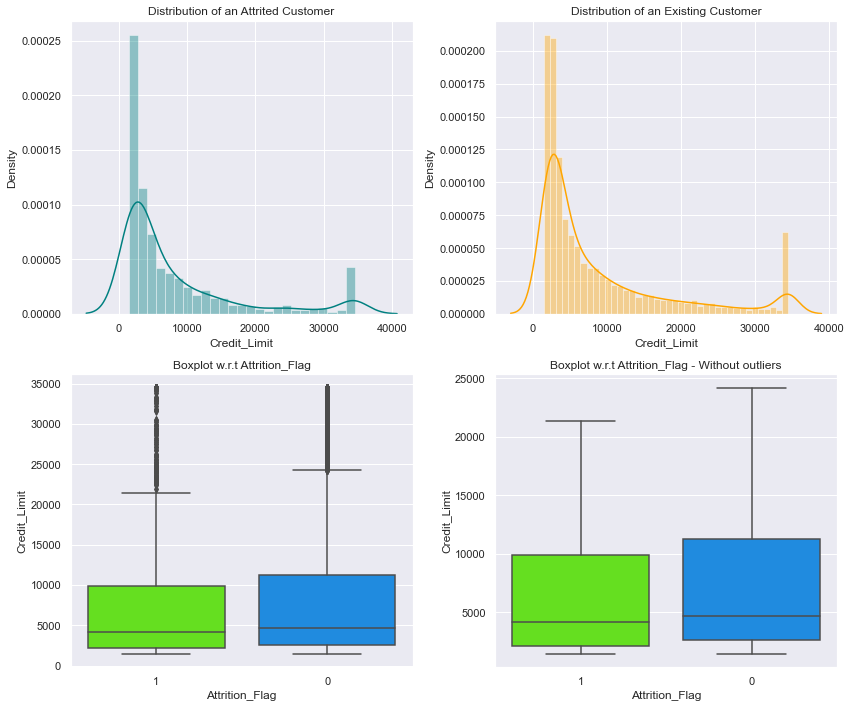

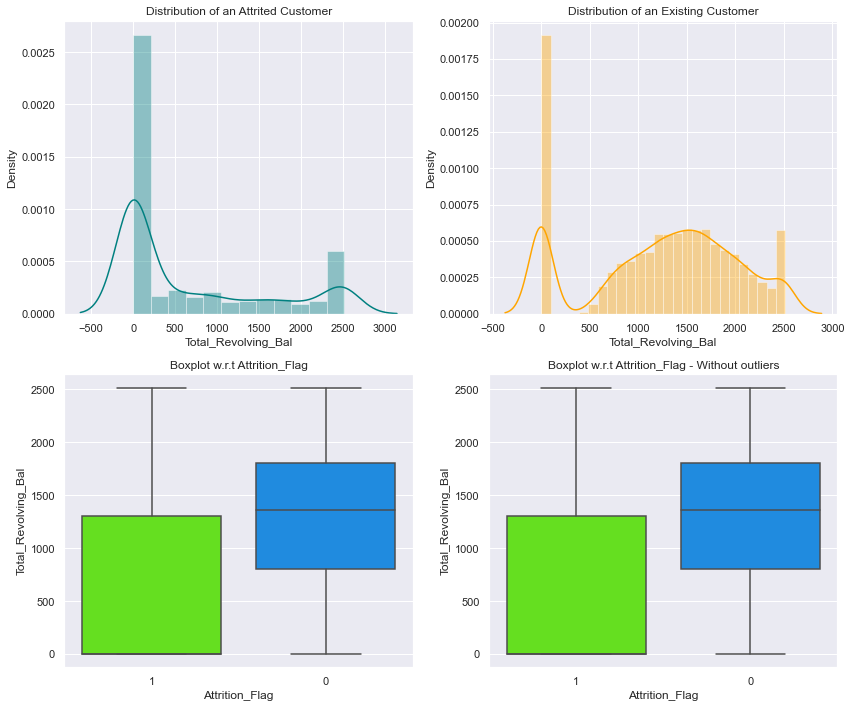

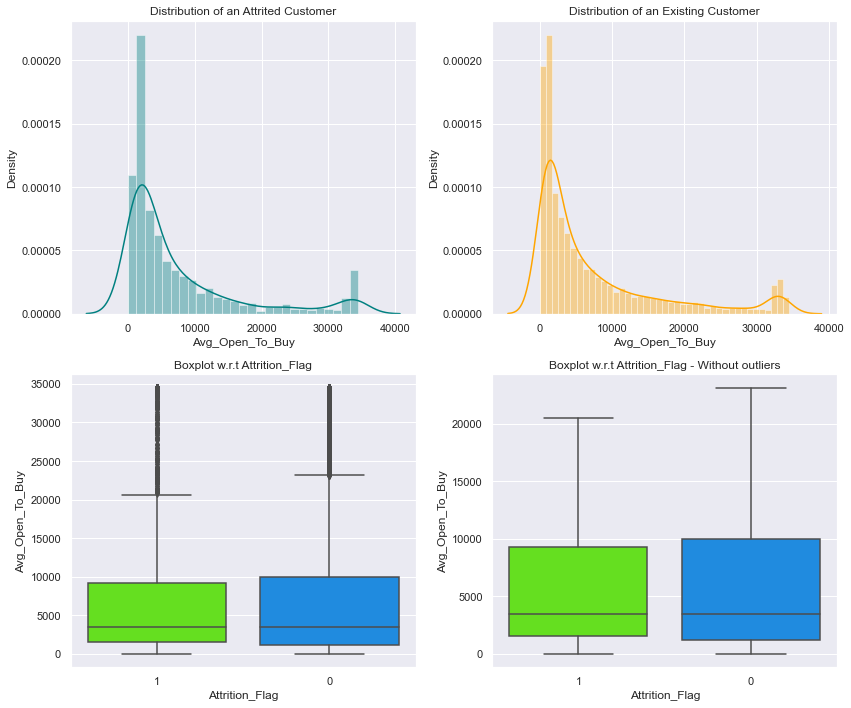

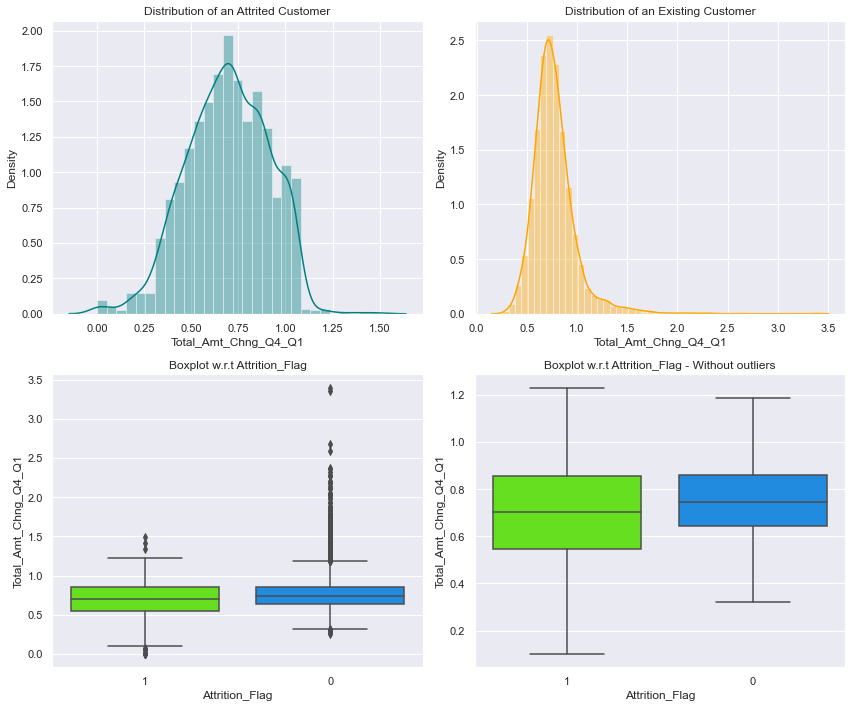

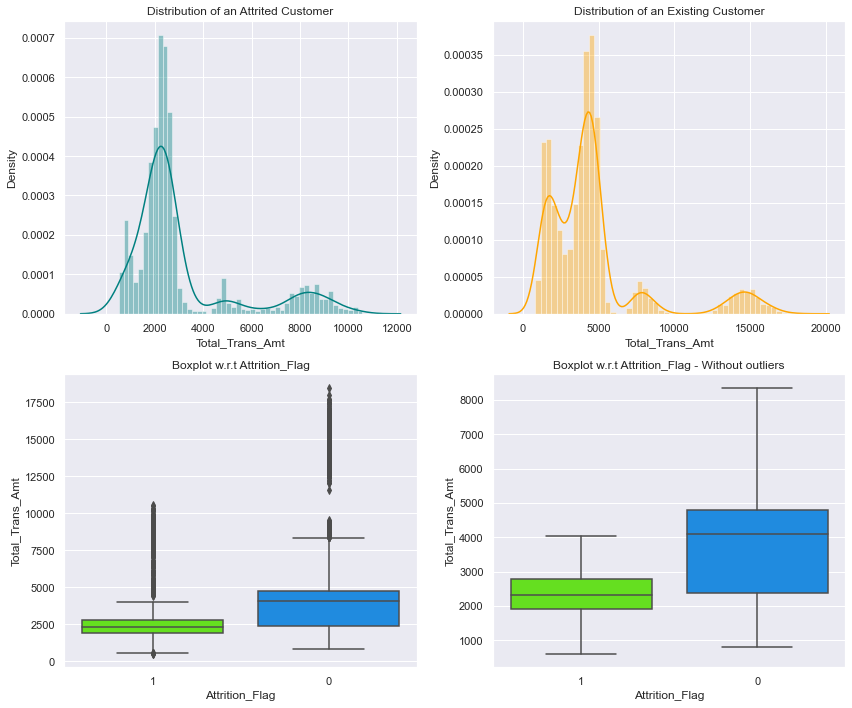

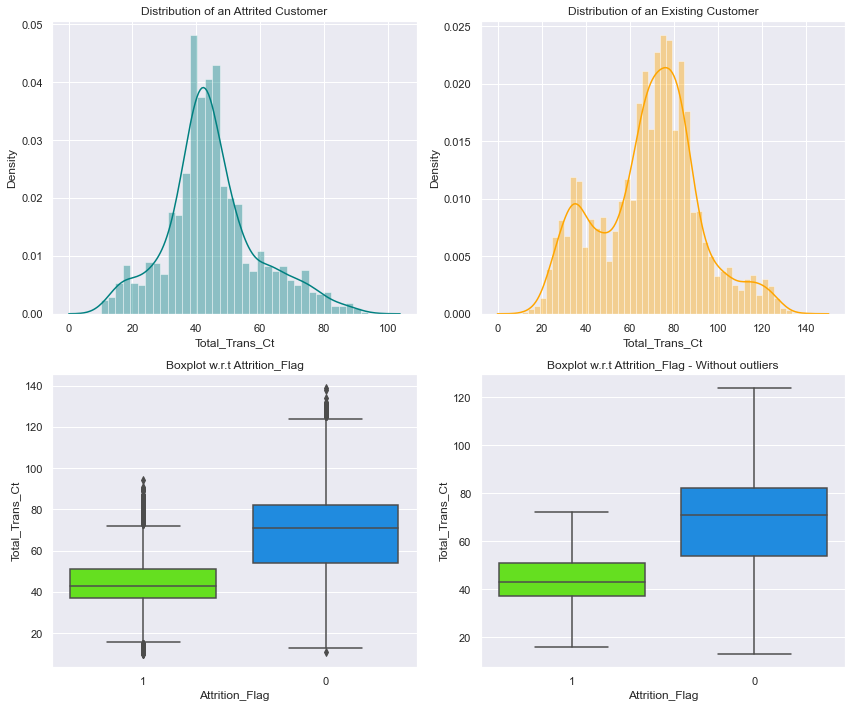

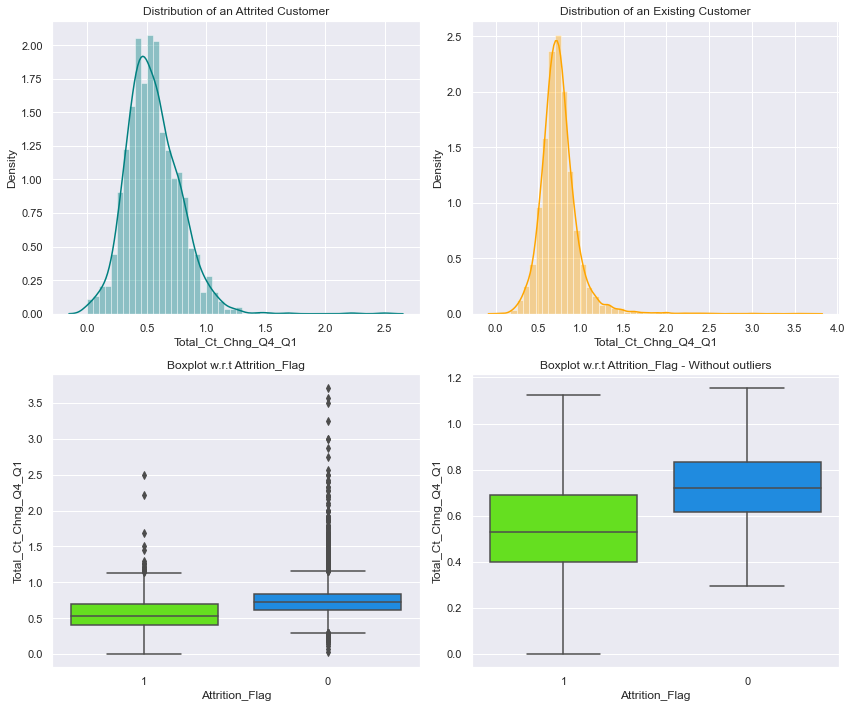

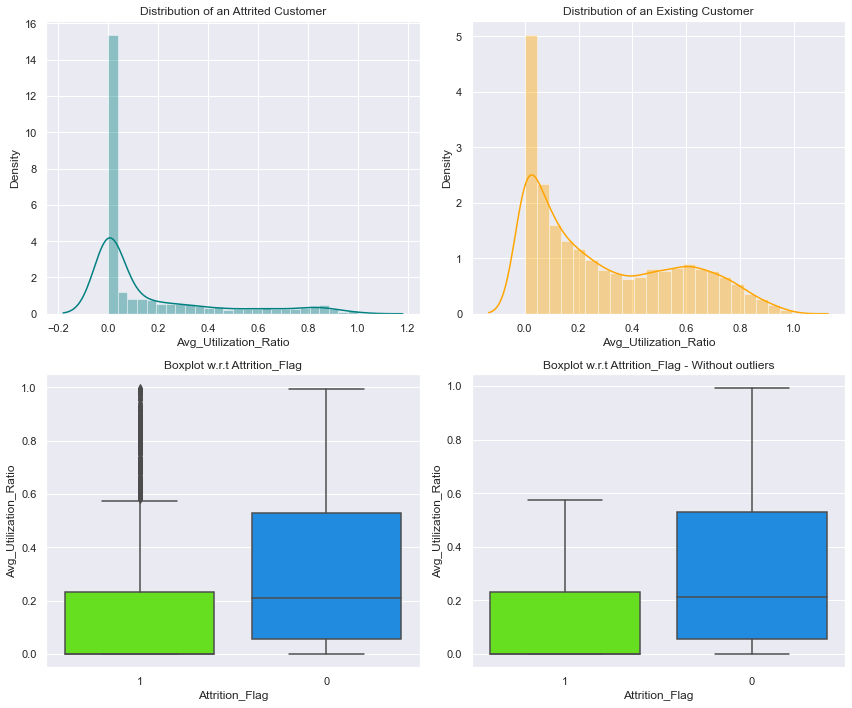

In [40]:
for colname in numv:
    plot(colname,target)

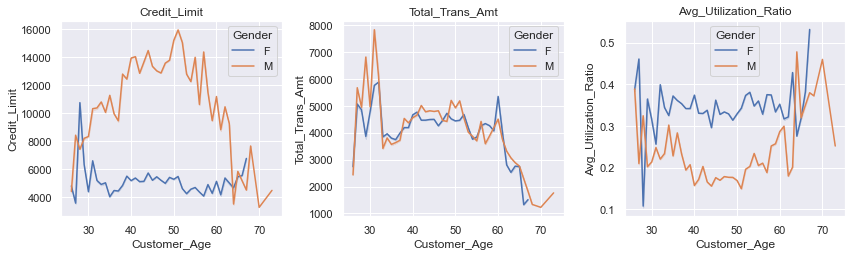

In [41]:
cols = data[['Credit_Limit','Total_Trans_Amt','Avg_Utilization_Ratio']].columns.tolist()
plt.figure(figsize=(12,10))
for i, variable in enumerate(cols):
                     plt.subplot(3,3,i+1)
                     sns.lineplot(data['Customer_Age'],data[variable],hue=data['Gender'],ci=0)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [42]:
# Time to get rid of extremes IQR or cook's distance, lets decide later.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [43]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

In [44]:
data1=data.copy()

In [45]:
# Encoding
gender = {'M':0,'F':1}
data1['Gender'] = data1['Gender'].map(gender)

education_level= {'Graduate':0, 'Uneducated':1,'High School':2,'College':3,'Post-Graduate':4,'Doctorate':5}  
data1['Education_Level'] = data1['Education_Level'].map(education_level)

marital_status = {'Married':0, 'Single':1,'Divorced':2}
data1['Marital_Status'] = data1['Marital_Status'].map(marital_status)

income_category = {'Less than $40K':0,'$40K - $60K':1,'$60K - $80K':2 ,'$80K - $120K':3,'$120K +':4} 
data1['Income_Category'] = data1['Income_Category'].map(income_category)

card_category = {'Blue':0,'Silver':1,'Gold':2,'Platinum':3} 
data1['Card_Category'] = data1['Card_Category'].map(card_category)

In [46]:
data1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.000,0.000,2.000,0,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,0,49,1,5,0.000,1.000,0.000,0,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,0,51,0,3,0.000,0.000,3.000,0,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.000,NaN,0.000,0,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,0,40,0,3,1.000,0.000,2.000,0,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [47]:
imputer = KNNImputer(n_neighbors=5)

In [48]:
X = data1.drop(['Attrition_Flag'],axis=1)
y = data1['Attrition_Flag']

In [49]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [50]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [51]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [52]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [53]:
inverse_mapping(gender,'Gender')
inverse_mapping(education_level,'Education_Level')
inverse_mapping(marital_status,'Marital_Status')
inverse_mapping(income_category,'Income_Category')
inverse_mapping(card_category,'Card_Category')

In [54]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2289
High School      1792
Uneducated       1526
College           805
Post-Graduate     354
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3443
Single      3107
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2620
$40K - $60K       1508
$80K - $120K      1250
$60K - $80K       1190
$120K +            520
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [55]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3753
M    3335
Name: Gender, dtype: int64
******************************
Graduate         2289
High School      1792
Uneducated       1526
College           805
Post-Graduate     354
Doctorate         322
Name: Education_Level, dtype: int64
******************************
Married     3443
Single      3107
Divorced     538
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2620
$40K - $60K       1508
$80K - $120K      1250
$60K - $80K       1190
$120K +            520
Name: Income_Category, dtype: int64
******************************
Blue        6619
Silver       373
Gold          81
Platinum      15
Name: Card_Category, dtype: int64
******************************


In [56]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


In [57]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):

    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [58]:
# Fancy confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):

    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

Accuracy on training set :  0.8820541760722348
Accuracy on test set :  0.8812109246462653
Recall on training set :  0.46093064091308167
Recall on test set :  0.45491803278688525
Precision on training set :  0.7028112449799196
Precision on test set :  0.7003154574132492


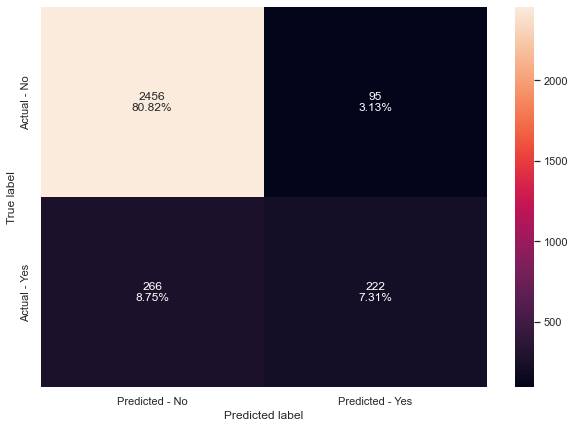

In [60]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

In [ ]:
# Oversampling soon.